In [9]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import os
import random
import pandas as pd
import torchvision
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

In [3]:
path = 'norm'
files = os.listdir(path)
dataset = []

for file in files:
    file_path = os.path.join(path, file)
    if os.path.isdir(file_path):
        images = os.listdir(file_path)
        for image in images:
            img = Image.open(os.path.join(file_path, image))
            img = img.copy()
            img = img.convert("RGB")
            dataset.append([img, int(file.split()[0][1])])
print(len(dataset))

1281


In [4]:
random.shuffle(dataset)
train_dataset = dataset[0:1001]
val_dataset = dataset[1001:1141]
test_dataset = dataset[1141:1281]
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

1001
140
140


In [5]:
train_dataset_x = []
train_dataset_y = []
val_dataset_x = []
val_dataset_y = []
test_dataset_x = []
test_dataset_y = []

for i in range(len(train_dataset)):
    train_dataset_x.append(train_dataset[i][0])
    train_dataset_y.append(train_dataset[i][1])
for i in range(len(val_dataset)):
    val_dataset_x.append(val_dataset[i][0])
    val_dataset_y.append(val_dataset[i][1])
for i in range(len(test_dataset)):
    test_dataset_x.append(test_dataset[i][0])
    test_dataset_y.append(test_dataset[i][1])

In [6]:
train_dataset_x[0], train_dataset_y[0]

(<PIL.Image.Image image mode=RGB size=270x330>, 1)

In [7]:
class CustomDataset(Dataset):
    def __init__(self, data, labels, img_transform):
        self.data = data
        self.labels = labels
        self.img_transform = img_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        sample = self.img_transform(sample)
        label = self.labels[idx]
        return sample, label


In [8]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = CustomDataset(train_dataset_x, train_dataset_y, transform)
val_dataset = CustomDataset(val_dataset_x, val_dataset_y, transform)
test_dataset = CustomDataset(test_dataset_x, test_dataset_y, transform)

batch_size = 16

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [11]:
model = torchvision.models.get_model("vit_b_32", weights='DEFAULT')

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    total_accuracy = 0.0
    total_samples = 0
    for inputs, labels in tqdm(train_dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, predicted_classes = torch.max(outputs, 1)
        accuracy = (predicted_classes == labels).float().mean()
        total_accuracy += accuracy.item() * inputs.size(0)
        total_samples += inputs.size(0)
        
    print(f"Epoch {epoch + 1}: Loss: {loss.item()}, Training Accuracy: {total_accuracy / total_samples}")

    model.eval()
    total_accuracy = 0.0
    total_samples = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted_classes = torch.max(outputs, 1)
            accuracy = (predicted_classes == labels).float().mean()
            total_accuracy += accuracy.item() * inputs.size(0)
            total_samples += inputs.size(0)
            
    print("Validation Accuracy:", total_accuracy / total_samples)


  0%|          | 0/63 [00:00<?, ?it/s]c:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
100%|██████████| 63/63 [00:03<00:00, 17.12it/s]


Epoch 1: Loss: 0.7170276641845703


100%|██████████| 63/63 [00:03<00:00, 18.60it/s]


Epoch 2: Loss: 0.10970321297645569


100%|██████████| 63/63 [00:03<00:00, 18.49it/s]


Epoch 3: Loss: 0.004715916234999895


100%|██████████| 63/63 [00:03<00:00, 18.43it/s]


Epoch 4: Loss: 0.05931862071156502


100%|██████████| 63/63 [00:03<00:00, 18.58it/s]


Epoch 5: Loss: 0.21532438695430756


100%|██████████| 63/63 [00:03<00:00, 18.37it/s]


Epoch 6: Loss: 0.03085433691740036


100%|██████████| 63/63 [00:03<00:00, 18.44it/s]


Epoch 7: Loss: 0.040006402879953384


100%|██████████| 63/63 [00:03<00:00, 18.42it/s]


Epoch 8: Loss: 0.055183108896017075


100%|██████████| 63/63 [00:03<00:00, 18.35it/s]


Epoch 9: Loss: 0.00020931866311002523


100%|██████████| 63/63 [00:03<00:00, 18.36it/s]


Epoch 10: Loss: 6.035387923475355e-05


100%|██████████| 63/63 [00:03<00:00, 18.33it/s]


Epoch 11: Loss: 0.0043639144860208035


100%|██████████| 63/63 [00:03<00:00, 18.18it/s]


Epoch 12: Loss: 0.0005029437015764415


100%|██████████| 63/63 [00:03<00:00, 18.37it/s]


Epoch 13: Loss: 0.00011066779552493244


100%|██████████| 63/63 [00:03<00:00, 18.30it/s]


Epoch 14: Loss: 0.0006824434385634959


100%|██████████| 63/63 [00:03<00:00, 18.25it/s]


Epoch 15: Loss: 0.00014370839926414192
Validation Accuracy: 0.9928571428571429


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


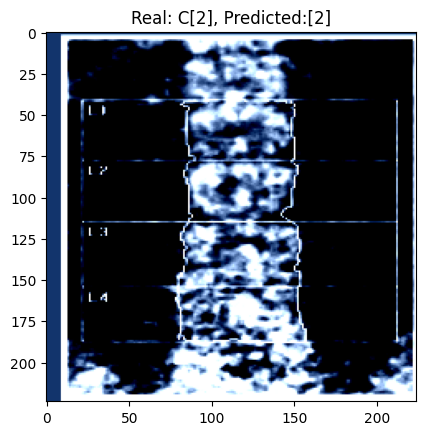

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


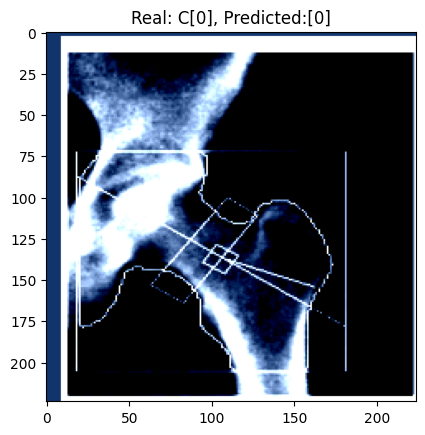

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


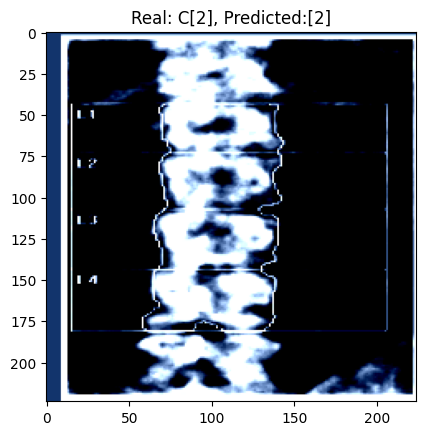

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


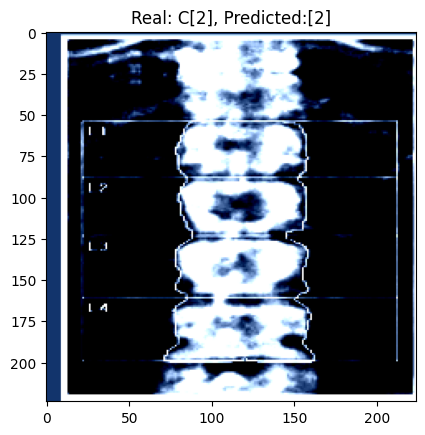

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


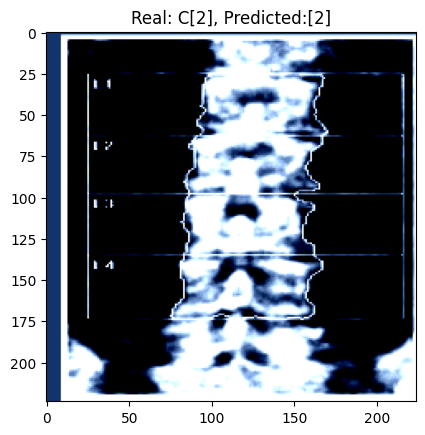

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


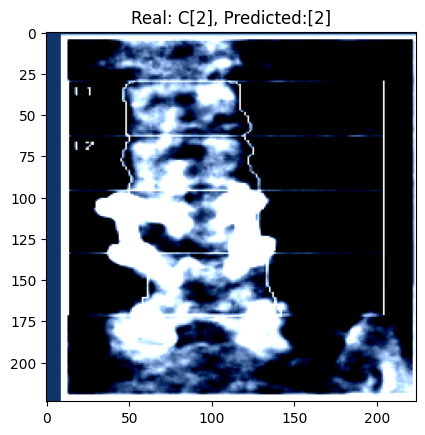

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


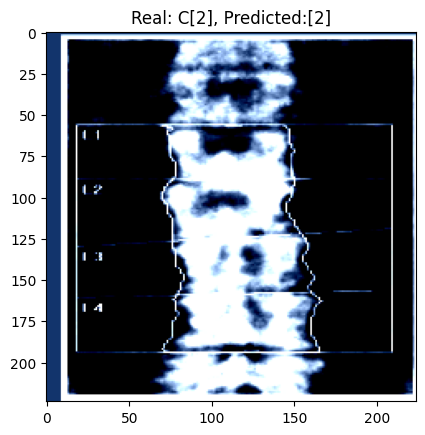

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


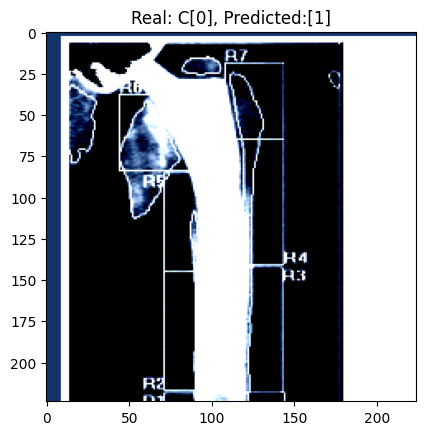

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


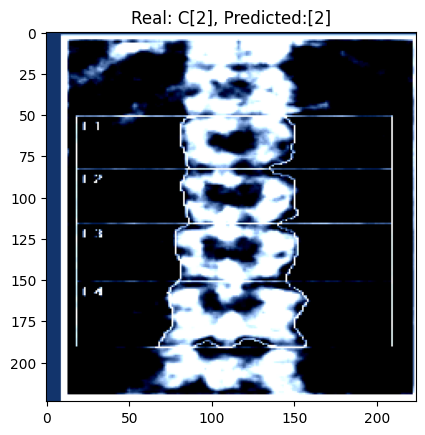

In [16]:
import matplotlib.pyplot as plt

real_labels_list = []
predicted_labels_list = []
images_list = []

for inputs, labels in val_dataloader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    predictions = torch.argmax(outputs, dim=-1)

    real_labels = labels.cpu().numpy()
    predicted_labels = predictions.cpu().numpy()
    images = inputs.cpu().numpy()

    real_labels_list.extend(real_labels)
    predicted_labels_list.extend(predicted_labels)
    img = inputs[0].permute(1, 2, 0).cpu().numpy()
    plt.imshow(img)
    plt.title(f'Real: C{[real_labels[0]]}, Predicted:{[predicted_labels[0]]}')
    plt.show()